# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking/dataset/HousesInfo.csv')

In [6]:
target_col = 'Price'

#### Thresholds

In [7]:
threshold_NaN = 0.5

In [8]:
threshold_cat = 5

In [9]:
threshold_Z = 3.0

In [10]:
test_size = 0.33

In [11]:
threshold_entropy = 0.75

In [12]:
threshold_corr = 0.95

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

#### Drop user's columns:

In [16]:
user_drop_cols = []

Dataset before deletion

In [17]:
display(df)

Number_of_Bedrooms  Number_of_bathrooms  Area  Zipcode   Price
0                     4                  4.0  4053    85255  869500
1                     4                  3.0  3343    36372  865200
2                     3                  4.0  3923    85266  889000
3                     5                  5.0  4022    85262  910000
4                     3                  4.0  4116    85266  971226
..                  ...                  ...   ...      ...     ...
530                   5                  2.0  2066    94531  399900
531                   4                  3.5  9536    94531  460000
532                   3                  2.0  2014    94531  407000
533                   4                  3.0  2312    94531  419000
534                   5                  3.0  3796    94531  615000

[535 rows x 5 columns]

In [18]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [19]:
display(df)

Number_of_Bedrooms  Number_of_bathrooms  Area  Zipcode   Price
0                     4                  4.0  4053    85255  869500
1                     4                  3.0  3343    36372  865200
2                     3                  4.0  3923    85266  889000
3                     5                  5.0  4022    85262  910000
4                     3                  4.0  4116    85266  971226
..                  ...                  ...   ...      ...     ...
530                   5                  2.0  2066    94531  399900
531                   4                  3.5  9536    94531  460000
532                   3                  2.0  2014    94531  407000
533                   4                  3.0  2312    94531  419000
534                   5                  3.0  3796    94531  615000

[535 rows x 5 columns]

#### Dataset copy

In [20]:
df_copy = df.copy()

### Dataset Information

In [21]:
df.shape

(535, 5)

#### Some records

In [22]:
display(df)

Number_of_Bedrooms  Number_of_bathrooms  Area  Zipcode   Price
0                     4                  4.0  4053    85255  869500
1                     4                  3.0  3343    36372  865200
2                     3                  4.0  3923    85266  889000
3                     5                  5.0  4022    85262  910000
4                     3                  4.0  4116    85266  971226
..                  ...                  ...   ...      ...     ...
530                   5                  2.0  2066    94531  399900
531                   4                  3.5  9536    94531  460000
532                   3                  2.0  2014    94531  407000
533                   4                  3.0  2312    94531  419000
534                   5                  3.0  3796    94531  615000

[535 rows x 5 columns]

#### Dataframe structure

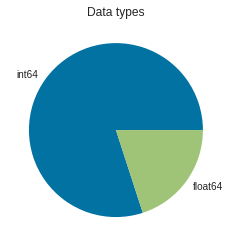

In [23]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [24]:
display(df.describe().T)

count           mean            std      min       25%  \
Number_of_Bedrooms   535.0       3.377570       1.160952      1.0       3.0   
Number_of_bathrooms  535.0       2.664953       0.995077      1.0       2.0   
Area                 535.0    2364.904673    1224.556982    701.0    1440.0   
Zipcode              535.0   90937.768224    7141.857452  36372.0   92276.0   
Price                535.0  589362.811215  509026.067649  22000.0  249200.0   

                          50%       75%        max  
Number_of_Bedrooms        3.0       4.0       10.0  
Number_of_bathrooms       2.5       3.0        7.0  
Area                   2078.0    3067.5     9583.0  
Zipcode               92880.0   93510.0    98021.0  
Price                529000.0  728500.0  5858000.0

#### Which columns could be categorical ?

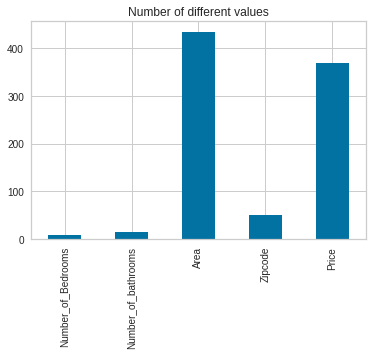

In [25]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [26]:
duplicates(df)

Number of rows before removing: 535
Number of duplicate rows: 5
Number of rows after removing: 530


Number_of_Bedrooms  Number_of_bathrooms  Area  Zipcode   Price
0                     4                  4.0  4053    85255  869500
1                     4                  3.0  3343    36372  865200
2                     3                  4.0  3923    85266  889000
3                     5                  5.0  4022    85262  910000
4                     3                  4.0  4116    85266  971226
..                  ...                  ...   ...      ...     ...
530                   5                  2.0  2066    94531  399900
531                   4                  3.5  9536    94531  460000
532                   3                  2.0  2014    94531  407000
533                   4                  3.0  2312    94531  419000
534                   5                  3.0  3796    94531  615000

[530 rows x 5 columns]

#### Drop NaN:

In [27]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [28]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [29]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [30]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Number_of_Bedrooms
Encoding numeric column: Number_of_bathrooms
Encoding numeric column: Area
Encoding numeric column: Zipcode
Encoding numeric column: Price


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


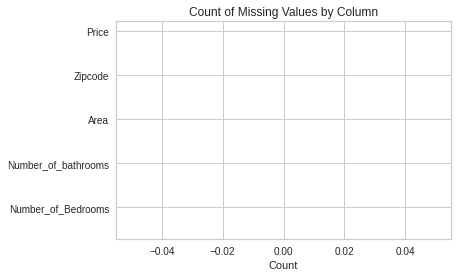

In [31]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [32]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [33]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.02MB
Memory usage after optimization is: 0.01MB
Decreased by 74.6%


##### Dataframe structure after compression

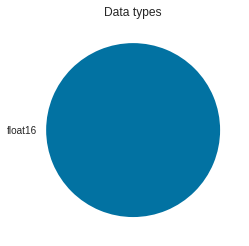

In [34]:
plot_dataframe_structure(df)

#### Outliers:

In [35]:
df = outliers(df, threshold_Z)

Using Z_score,  39  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

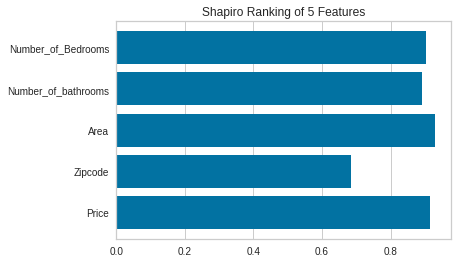

In [36]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

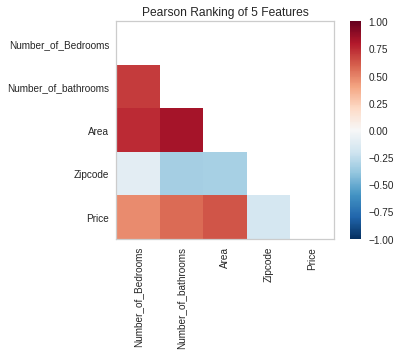

In [37]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

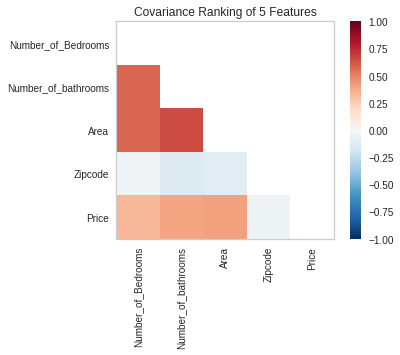

In [38]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

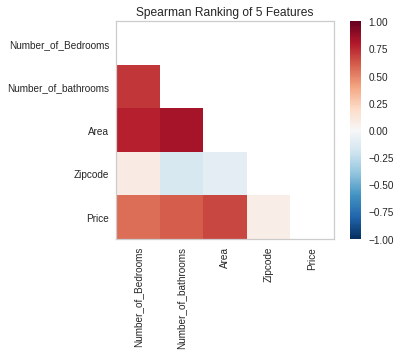

In [39]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

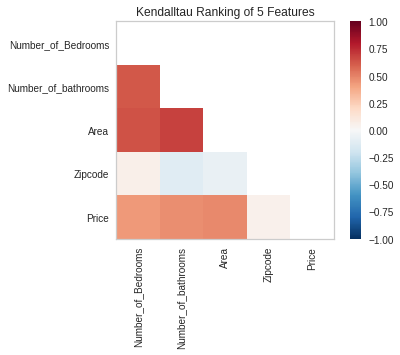

In [40]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [41]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [42]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [43]:
y = df[target_col]

In [44]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

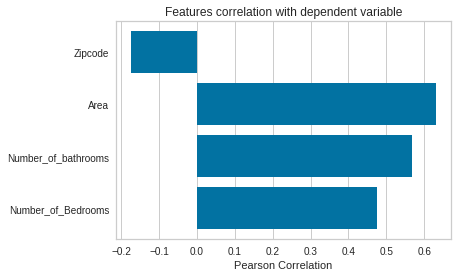

In [45]:
feature_correlation(X, y);

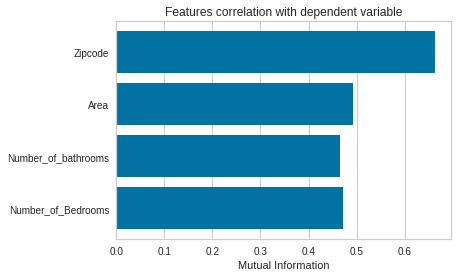

In [46]:
feature_correlation(X, y, method='mutual_info-regression');

###### Correlation with Seaborn

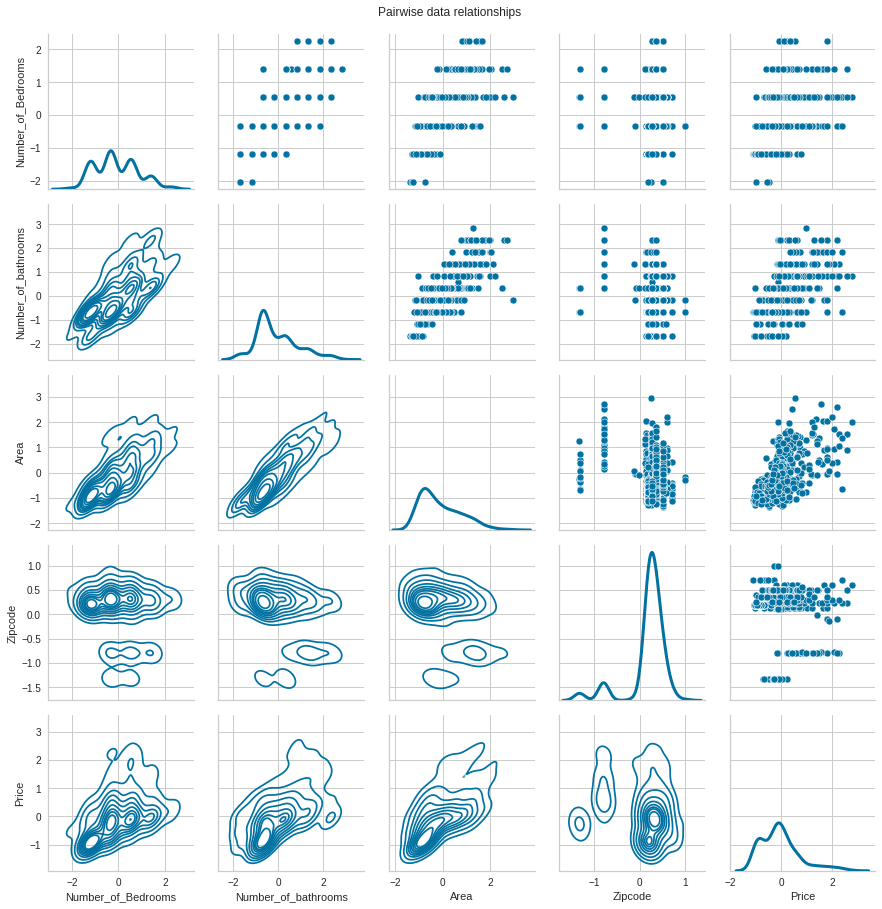

In [47]:
plot_sns_corr_regre(df, target_col)

###### Heatmap with Seaborn

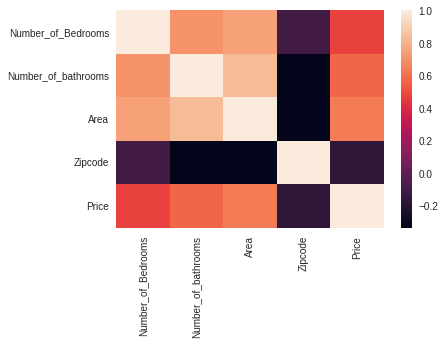

In [48]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

#### Feature importance (a priori)

##### According to decision tree

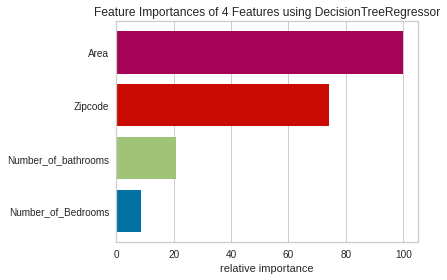

In [49]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

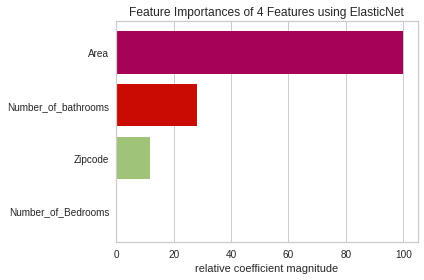

In [50]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

#### Check columns that should be dropped

In [51]:
print(dropped_cols)

[]


## Splittings 

In [52]:
df = df_copy

#### Splitting dataframe in features and targets

In [53]:
y = df[target_col]

In [54]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [55]:
nb_features = len(X.columns.tolist())

In [56]:
nb_targets = 1

In [57]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [58]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [59]:
cat_selector = make_column_selector(dtype_include=object)

In [60]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [61]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [62]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [63]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [64]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [65]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [66]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [67]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse'))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error'))), 
          ('DTRP', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='poisson'))), 
          ('RFRS', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=50))), 
          ('RFRA', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=50))), 
          ('RFRP', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=50))), 
          ('ABR', make_pipeline(tree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR10', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPR20', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ]

##### Level-1 model

In [68]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Stacking for regression

In [69]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [70]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/an

CPU times: user 404 ms, sys: 107 ms, total: 511 ms
Wall time: 9.93 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f988d88e410>),
                                                                                                 ('pipeline-2'...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f988d88d780>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(weights='distance'))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

### Model evaluation

#### Model scoring

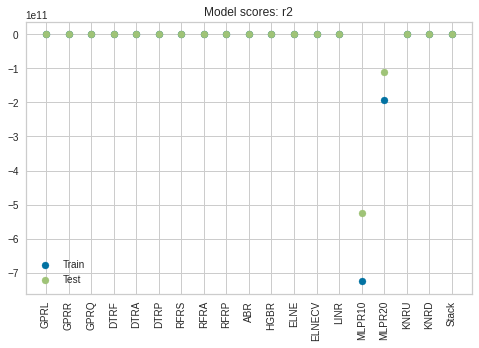

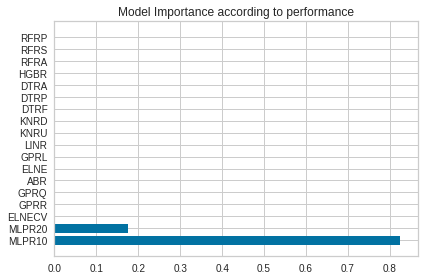

In [71]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

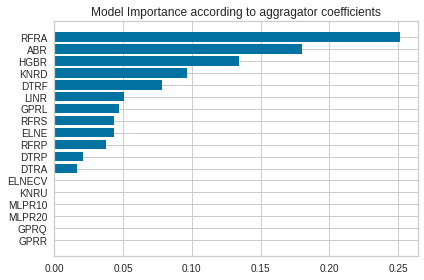

In [72]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

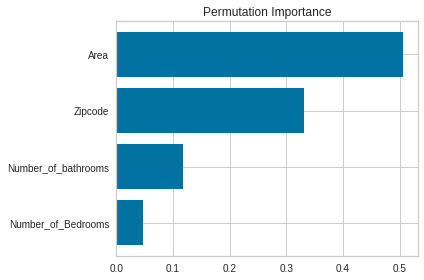

array([['Number_of_Bedrooms', 0.04642301615432576],
       ['Number_of_bathrooms', 0.11712286742583145],
       ['Zipcode', 0.3303306242599121],
       ['Area', 0.5061234921599307]], dtype=object)

In [73]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [74]:
features_of_interest = []

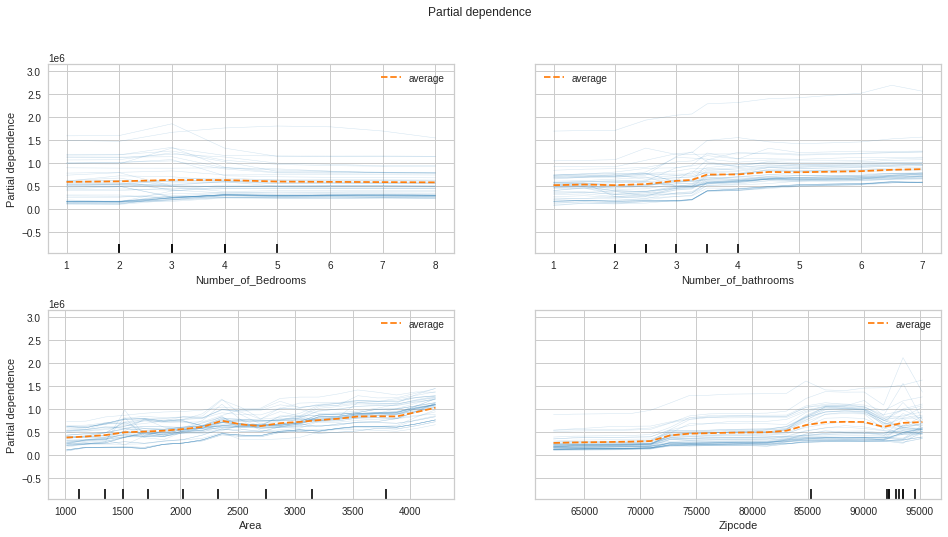

In [75]:
plot_partial_dependence(model, X_train, features_of_interest)

#### Residuals plot

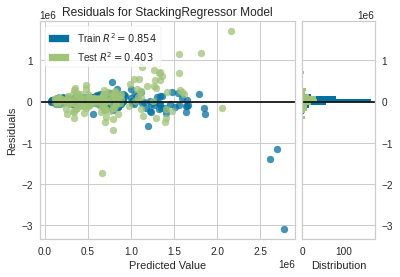

In [76]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

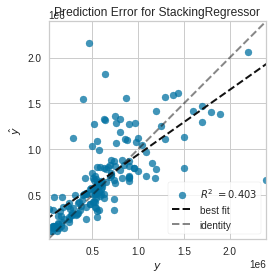

In [77]:
prediction_error(model, X_train, y_train, X_test, y_test);

### Final Model

In [78]:
threshold_model = 5

In [85]:
threshold_score = 0.1

##### Filtered Level-0 models

In [86]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [87]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Build final model

In [88]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [89]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 170 ms, sys: 26 ms, total: 196 ms
Wall time: 2.25 s


StackingRegressor(estimators=[('DTRF',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f988d88e410>),
                                                                                                 ('pipeline-2',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   Si...
                                                                                                                  ('ordinalencoder',
                                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                  unknown_value=-1))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f988d88d780>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(early_stopping=True))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

#### Final Model scoring

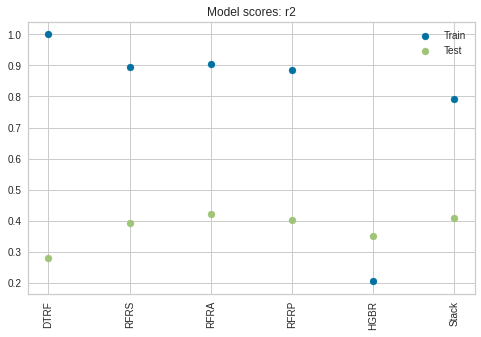

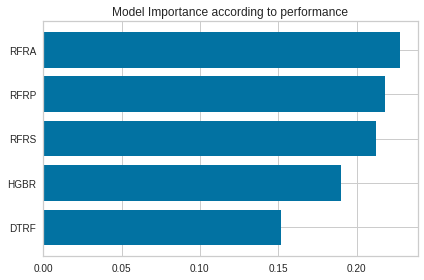

(array([['DTRF', 0.9999000801937349, 0.280808142843614],
        ['RFRS', 0.8950602795066527, 0.3928761353013913],
        ['RFRA', 0.9054287812862324, 0.4209253500850405],
        ['RFRP', 0.8852496367375156, 0.4030899892924109],
        ['HGBR', 0.20455143994510572, 0.351825693027477],
        ['Stack', 0.792316389177372, 0.4089934640741749]], dtype=object),
 array([['DTRF', 0.15182714247912568],
        ['HGBR', 0.19022485987113413],
        ['RFRS', 0.2124199831493922],
        ['RFRP', 0.2179424022981102],
        ['RFRA', 0.2275856122022377]], dtype=object))

In [90]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

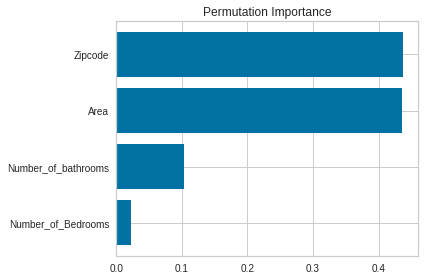

In [91]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [92]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [93]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [94]:
print(dropped_cols)

[]


#### Final Residuals plot

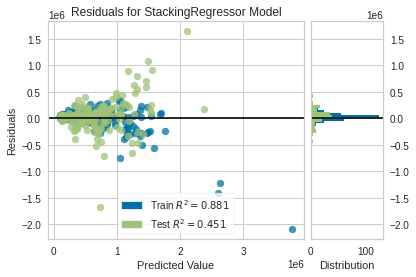

In [95]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Final Prediction error

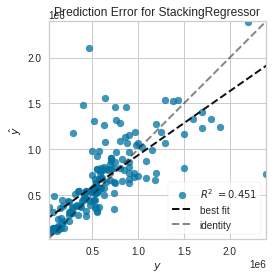

In [96]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Deployment

### Save your model

In [97]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [98]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)